# Flights Exploratory Data Analysis
-  ### ` Olawale Olushola`

## Introduction
> This project entails investigating flight datasets in the United States from 2007 to 2008. There are approximately 10 million records in the dataset. The dataset includes some interesting variables such as carriers, arrival and departure delays, Nasal delay, weather delay, and so on. Our aim is to explore the datset and find some interesting variable that cause flight delays.



## Preliminary Wrangling

We will begin our exploratory analysis by loading, accessing and cleaning the dataset.


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

# Display plot in the notebook

%matplotlib inline

In [2]:
# Download the 2007 and 2008 dataset

flight_2007 = !wget -O 2007.csv.bz2 https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/2BHLWK
flight_2008 = !wget -O 2008.csv.bz2 https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/EIR0RA


In [3]:
# Covert to a csv file by removing the .bz2 extension in the downloaded data

!bzip2 -d 2007.csv.bz2
!bzip2 -d 2008.csv.bz2

In [4]:
# Load the data into pandas dataframe

df_2007 = pd.read_csv('2007.csv').sample(frac = 0.30)

In [5]:
df_2007.shape

(2235964, 29)

In [6]:
# load 2008 data

df_2008 = pd.read_csv('2008.csv')

In [7]:
# check the dimension

df_2008.shape

(2389217, 29)

In [8]:
# Read the 2007 dataframe

df_2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5124760,2007,9,25,2,905.0,915,1139.0,1202,XE,2416,...,5,48,0,NaN,0,0,0,0,0,0
4445516,2007,8,31,5,1559.0,1535,1639.0,1625,WN,1718,...,4,11,0,NaN,0,0,0,0,0,0
4750801,2007,8,27,1,958.0,1000,1204.0,1208,FL,424,...,13,8,0,NaN,0,0,0,0,0,0
2899382,2007,5,8,2,1435.0,1435,1538.0,1548,NW,931,...,4,10,0,NaN,0,0,0,0,0,0
3339464,2007,6,18,1,NaN,800,NaN,941,UA,1433,...,0,0,1,A,0,0,0,0,0,0


In [9]:
# Read the 2008 data

df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [10]:
# Merge the 2007 and 2008 dataset

flight_df = df_2007.append(df_2008)

In [11]:
# check the combined data

flight_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5124760,2007,9,25,2,905.0,915,1139.0,1202,XE,2416,...,5.0,48.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4445516,2007,8,31,5,1559.0,1535,1639.0,1625,WN,1718,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4750801,2007,8,27,1,958.0,1000,1204.0,1208,FL,424,...,13.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2899382,2007,5,8,2,1435.0,1435,1538.0,1548,NW,931,...,4.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3339464,2007,6,18,1,NaN,800,NaN,941,UA,1433,...,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0


In [12]:
flight_df.shape

(4625181, 29)

In [13]:
# Check the information 

flight_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4625181 entries, 5124760 to 2389216
Data columns (total 29 columns):
Year                 4625181 non-null int64
Month                4625181 non-null int64
DayofMonth           4625181 non-null int64
DayOfWeek            4625181 non-null int64
DepTime              4512743 non-null float64
CRSDepTime           4625181 non-null int64
ArrTime              4501810 non-null float64
CRSArrTime           4625181 non-null int64
UniqueCarrier        4625181 non-null object
FlightNum            4625181 non-null int64
TailNum              4582725 non-null object
ActualElapsedTime    4501810 non-null float64
CRSElapsedTime       4624461 non-null float64
AirTime              4501810 non-null float64
ArrDelay             4501810 non-null float64
DepDelay             4512743 non-null float64
Origin               4625181 non-null object
Dest                 4625181 non-null object
Distance             4625181 non-null int64
TaxiIn               455508

From the above information abbove, we have some features that are not in their correct datatype like Arrival time, Departture time e.tc.

In [14]:
# Convert data type to datetime for DepTime, CRSDepTime, ArrTime, and CRSArrTime

flight_df['DepTime'] = (pd.to_timedelta(flight_df['DepTime'] // 100, unit='h') +\
                   pd.to_timedelta(flight_df['DepTime'] % 100, unit='m'))

flight_df['CRSDepTime'] = (pd.to_timedelta(flight_df['CRSDepTime'] // 100, unit='h') +\
                   pd.to_timedelta(flight_df['CRSDepTime'] % 100, unit='m'))

flight_df['ArrTime'] = (pd.to_timedelta(flight_df['ArrTime'] // 100, unit='h') +\
                   pd.to_timedelta(flight_df['ArrTime'] % 100, unit='m'))

flight_df['CRSArrTime'] = (pd.to_timedelta(flight_df['CRSArrTime'] // 100, unit='h') +\
                   pd.to_timedelta(flight_df['CRSArrTime'] % 100, unit='m'))


In [15]:
#convert day of the month to three letter format

flight_df['Month'] = pd.to_datetime(flight_df['Month'],format = '%m').dt.month_name().str.slice(stop=3)

In [16]:
# Mapping month and converting to object datatype

days = {1:'Mon', 2: 'Tues', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat', 7:'Sun'}

flight_df['DayOfWeek'] = flight_df['DayOfWeek'].map(days)

In [17]:
# check for duplicated rows and drop them

flight_df.duplicated().sum()

6

We have 7 dupluicate rows in the dataset, so will drop the duplicates.

In [18]:
# Drop duplicated rows

flight_df.drop_duplicates(inplace = True)

In [19]:
# check the information of our dataframe

flight_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4625175 entries, 5124760 to 2389216
Data columns (total 29 columns):
Year                 4625175 non-null int64
Month                4625175 non-null object
DayofMonth           4625175 non-null int64
DayOfWeek            4625175 non-null object
DepTime              4512737 non-null timedelta64[ns]
CRSDepTime           4625175 non-null timedelta64[ns]
ArrTime              4501804 non-null timedelta64[ns]
CRSArrTime           4625175 non-null timedelta64[ns]
UniqueCarrier        4625175 non-null object
FlightNum            4625175 non-null int64
TailNum              4582719 non-null object
ActualElapsedTime    4501804 non-null float64
CRSElapsedTime       4624455 non-null float64
AirTime              4501804 non-null float64
ArrDelay             4501804 non-null float64
DepDelay             4512737 non-null float64
Origin               4625175 non-null object
Dest                 4625175 non-null object
Distance             4625175 non-

Let's drop columns that are not useful in our analysis.

In [20]:
# Drop column that won't count in our analysis

drop_columns = ["TailNum","TaxiIn", "TaxiOut", "Diverted"]

flight_df.drop(columns = drop_columns, axis = 1, inplace = True)

In [21]:
# check that there are no null values

flight_df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               112438
CRSDepTime                 0
ArrTime               123371
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
ActualElapsedTime     123371
CRSElapsedTime           720
AirTime               123371
ArrDelay              123371
DepDelay              112438
Origin                     0
Dest                       0
Distance                   0
Cancelled                  0
CancellationCode     4512736
CarrierDelay         1804632
WeatherDelay         1804632
NASDelay             1804632
SecurityDelay        1804632
LateAircraftDelay    1804632
dtype: int64

There are null values in this dataset. But these columns will be useful in our analysis, so we wont drop them.

In [22]:
# check the shape of our data

flight_df.shape

(4625175, 25)

Our dataset contains about 4.6 millions rows and 25 features after dropping some of them. We can now store our cleaned dataset.

In [23]:
# Store the dataframe

flight_df.to_csv("master_flightsData.csv", index = False)

In [2]:
# Read and load the saved flight data

flight = pd.read_csv('master_flightsData.csv')

In [25]:
flight.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4625175 entries, 0 to 4625174
Data columns (total 25 columns):
Year                 4625175 non-null int64
Month                4625175 non-null object
DayofMonth           4625175 non-null int64
DayOfWeek            4625175 non-null object
DepTime              4512737 non-null object
CRSDepTime           4625175 non-null object
ArrTime              4501804 non-null object
CRSArrTime           4625175 non-null object
UniqueCarrier        4625175 non-null object
FlightNum            4625175 non-null int64
ActualElapsedTime    4501804 non-null float64
CRSElapsedTime       4624455 non-null float64
AirTime              4501804 non-null float64
ArrDelay             4501804 non-null float64
DepDelay             4512737 non-null float64
Origin               4625175 non-null object
Dest                 4625175 non-null object
Distance             4625175 non-null int64
Cancelled            4625175 non-null int64
CancellationCode     112439 non-

In [26]:
# Display full column width

pd.set_option("display.max_columns", 29 )


#pd.set_option("display.max_colwidth", 29)
flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,Sep,25,Tues,0 days 09:05:00.000000000,0 days 09:15:00.000000000,0 days 11:39:00.000000000,0 days 12:02:00.000000000,XE,2416,154.0,167.0,101.0,-23.0,-10.0,EWR,SAV,708,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2007,Aug,31,Fri,0 days 15:59:00.000000000,0 days 15:35:00.000000000,0 days 16:39:00.000000000,0 days 16:25:00.000000000,WN,1718,100.0,110.0,85.0,14.0,24.0,BWI,BNA,588,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2007,Aug,27,Mon,0 days 09:58:00.000000000,0 days 10:00:00.000000000,0 days 12:04:00.000000000,0 days 12:08:00.000000000,FL,424,66.0,68.0,45.0,-4.0,-2.0,PNS,ATL,272,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2007,May,8,Tues,0 days 14:35:00.000000000,0 days 14:35:00.000000000,0 days 15:38:00.000000000,0 days 15:48:00.000000000,NW,931,63.0,73.0,49.0,-10.0,0.0,MEM,BTR,319,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2007,Jun,18,Mon,NaN,0 days 08:00:00.000000000,NaN,0 days 09:41:00.000000000,UA,1433,NaN,221.0,NaN,NaN,NaN,ORD,PHX,1440,1,A,0.0,0.0,0.0,0.0,0.0


### What is the structure of your dataset?

> The dataset includes approximately 9.6 million flight details with 29 features which after cleaning we had aprroximately 4.6 millions rows and 25 features to reduce the memory. The information gathered covered the years 2007 and 2008. The variables in the dataset include information about the origin, departure, date and time of the flight, duration, cancellation status, delay (and cause of delay), and so on.
A flight is also considered delayed if its arrival time is more than 15 minutes late.

### What is/are the main feature(s) of interest in your dataset?

> Our analysis will be more focused on the cause of flight delays and how the features relate to the delayed flights are distributed.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following parameters will be useful for the analysis: `ArrDelay, DepDelay, Cancelled, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay`.

Some of the questions I'm thinking about are:
- Is there a pattern of more delays or cancellations in certain destinations or arrival cities?
- What is the most significant contribution of flight delays?
- Which holiday month is the most difficult to travel during?
- Which airport is the most efficient?
- Which airline is the most efficient, and which has the most cancelled and delayed flights?

## Univariate Exploration

> In this section, We'll start by looking at the distribution of the main variable of interest:
- Disatance  - AirTime - ArrDelay - DepDelay - delay_elapsed

In [3]:
# Function for title and xlabel

def viz(xlabel, title):
    
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show();

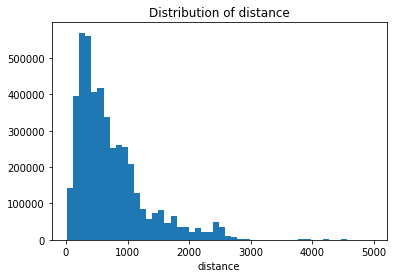

In [28]:
# Distribution of distance

plt.hist(data = flight, x = "Distance", bins = 50)

# call the function for xlabel and title
viz('distance', 'Distribution of distance')

We can observe some outliers in this distribution for distance greater than 3000km. Let's investigate further and find those airports whose distance is greater than 3000km. First, let's see the distriution for distance between 0 to 3000.

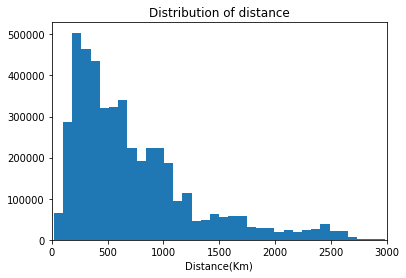

In [29]:
# Distribution between 0 and 3000.

plt.hist(data=flight, x="Distance", bins=60)

# set x-limit betweeen 0 and 3000

plt.xlim([0,3000])

# call the function for xlabel and title

viz('Distance(Km)', 'Distribution of distance')

We can see that there is a long tail distribution to the right. Let visualize using logarithm scale.

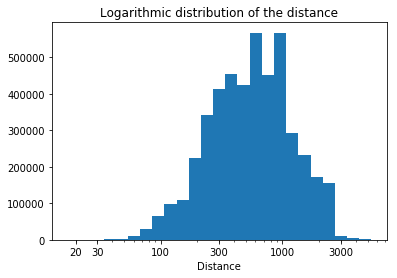

In [30]:
# Logarith scale distribution

bin = 10 ** np.arange(np.log10(flight.Distance.min()), np.log10(flight.Distance.max()) + 0.1, 0.1)

plt.hist(data=flight, x="Distance", bins=bin)

plt.xscale("log")
plt.xticks([20,30,100,300,1000,3000],[20,30,100,300,1000,3000]);

# call the function for xlabel and title

viz('Distance', 'Logarithmic distribution of the distance')

Clearly, initially the distribution of distance was long-tailed, with some data on the short end and a few on the long end. Howevever, When plotted on a log-scale, the distance distribution appears to be roughly normally distributed, with distance ceilings at the right foot. This is simply because the greater the distance between airports, the fewer flights are available.

Let's query places where the airport's distance is greater than 3000km.

In [31]:
# Query where distance is greater than 3000

extreme_airport = flight.query('Distance > 3000')

In [32]:
extreme_airport['Origin'].nunique()

15

We have 15 airports with far distance. Now let's get their names.

In [33]:
# List the airport

extreme_airport['Origin'].unique()

array(['HNL', 'DEN', 'ATL', 'LAX', 'KOA', 'ANC', 'ORD', 'IAH', 'DFW',
       'CVG', 'OGG', 'MSP', 'SJU', 'EWR', 'LIH'], dtype=object)

Let's visualize these airport and check the top 10 number among them.

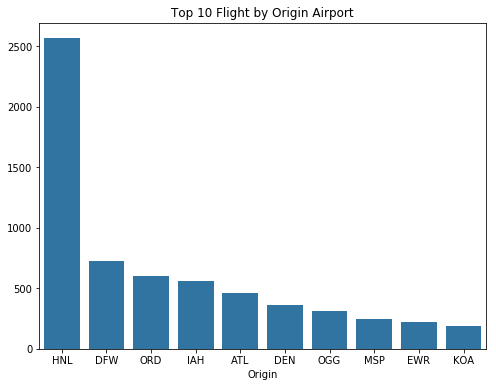

In [34]:
#sb.countplot(data =  extreme_airport, x = 'Origin', orient='y');

plt.figure(figsize=(8, 6))

# Plot of the top 10 airport by origin

# declare the base color
default_color = sb.color_palette()[0]

# store the top 10, add annotations and visualize the graph
top_origin = extreme_airport['Origin'].value_counts().sort_values(ascending = False).head(10)
sb.barplot(top_origin.index, top_origin.values, color = default_color);

# call the function for xlabel and title

viz('Origin', 'Top 10 Flight by Origin Airport')

Clearly, among airport that are 3000km away, flight from Honolulu International airport has the highest number of flights.

We have like 15 places where the distance are far. These maybe the reasons for the outliers because planes might not reach there on time. Let's investigate the reason for the delay.

### Which have the highest number of departure and arrival delay?

We will start by checking the departure delay and arrival delay factors.

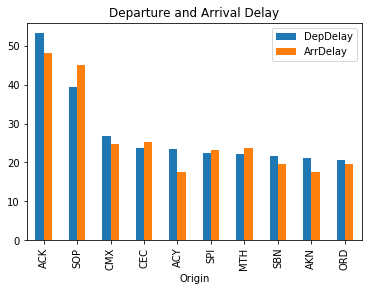

In [35]:
# Delay factor for top 10 flight 

flight.groupby('Origin').agg({'DepDelay':'mean', 'ArrDelay':'mean'})\
.sort_values('DepDelay', ascending=False).head(10).plot.bar();

# call the function for xlabel and title
viz('Origin', 'Departure and Arrival Delay')

We can see that for some of airport, departure is the delay factor while for some other airport, arrival of flights is the delay factor. However, ACK (Nantucket Memorial) airport reported to have the highest number of arrival and departure delay. We need a clear relationship between these two factor, so we will get a better understanding of these two factors by lookng at how related they are in the bivariate visualization section. 

### Are there Other Delay Factors?

Could the following factors be attributed to the delay factors in the flight?
- CarrierDelay
- WeatherDelay
- NASDelay
- SecurityDelay
- LateAircraftDelay

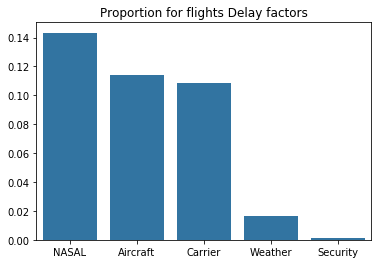

In [36]:
# Check delay factors

# The proportion where each type of delay occurs.

p_car = flight[(~flight.CarrierDelay.isnull())\
                     & (flight.CarrierDelay!=0)].shape[0] / flight.shape[0]

p_wea = flight[(~flight.WeatherDelay.isnull()) \
                     & (flight.WeatherDelay!=0)].shape[0] / flight.shape[0]

p_nas = flight[(~flight.NASDelay.isnull())\
                     & (flight.NASDelay!=0)].shape[0] / flight.shape[0]

p_sec = flight[(~flight.SecurityDelay.isnull())\
                     & (flight.SecurityDelay!=0)].shape[0] / flight.shape[0]

p_airc = flight[(~flight.LateAircraftDelay.isnull())\
                      & (flight.LateAircraftDelay!=0)].shape[0] / flight.shape[0]

delay_types = pd.Series([p_car,p_wea,p_nas,p_sec,p_airc],\
                        index=["Carrier","Weather","NASAL","Security","Aircraft"]).sort_values(ascending=False)

sb.barplot(delay_types.index, delay_types, color=sb.color_palette()[0])

# call the function for xlabel and title

viz('', 'Proportion for flights Delay factors')

Surprisingly, based on the observations above, we can see that weather and security delays are the least eminent delay factors, while Nasal, Aircraft, and carrier delays are the most notable delay factors. We will investigate this further in the bivariate and multivariate analysis section.

### What percentage of flights were cancelled?

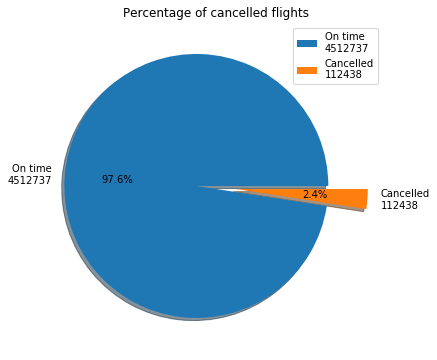

In [37]:
# Return the Series having frequency count of each unique value

cancelled_flight = flight['Cancelled'].value_counts()

# plot visualization

fig =plt.figure(figsize=(6,6))
labels =f'On time\n{cancelled_flight.values[0]}', f'Cancelled\n{cancelled_flight.values[1]}'
explode = (0,0.3)
plt.pie(cancelled_flight, explode = explode, labels=labels, autopct='%.1f%%', shadow = True)
plt.axis('equal')
plt.legend(loc ='upper right')

# call the function for xlabel and title

viz('', 'Percentage of cancelled flights')


About 2.4% flights were cancelled. We will explore more if the reason for cancelling was connected with Nasal and carrier delay or other factors.

### What could be the reasons for cancellation of these flight?

Let's check if the reasons for cancellation could be related to Nasal, carrier, security, weather delay.

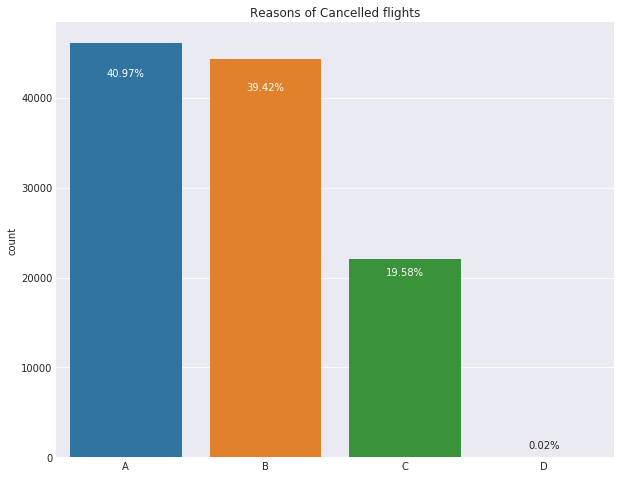

In [38]:
#bar plot
plt.figure(figsize=(10, 8))

sb.set_style('darkgrid')

sb.countplot(data=flight, x='CancellationCode')


# add annotations
gen_counts = flight['CancellationCode'].value_counts()
# take proportion only out of Cancelled flights, not total dataframe
n_points = gen_counts.sum()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    pct_string = f'{100*count/n_points:0.2f}%'
    
    # print the annotation just below the top of the bar
    if count > 2000:
        # print the annotation just below the top of the bar
        plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'w')
    else:
        plt.text(loc, 1000, pct_string, ha = 'center')  
        

# call the function for xlabel and title

viz('', 'Reasons of Cancelled flights')



Color code: (A = carrier, B = weather, C = NAS, D = security)

We observed that the carrier account for 41% of the cancelled flight, followed by weather (39%) and Naval while secuirty doesn't have no effect on cancelling a flight. These insight has shown us that aircraft doesnt have effect on cancelling flight and that weather causes larger perntage of delay than NAS as initially thought.

### Which month of the year have higher flight?

Let's explore the month with higher flight.

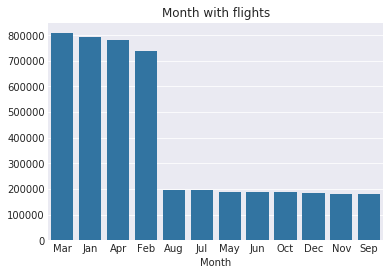

In [39]:
default_color = sb.color_palette()[0]

# store the top 10, add annotations and visualize the graph
top_month = flight['Month'].value_counts()
sb.barplot(top_month.index, top_month.values, color = default_color);

# call the function for xlabel and title

viz('Month', 'Month with flights')

From the above graph, the first four months of the year tend to have higher flight. This may be because more people travel during this period.

### What are the top 10 most busiest airport?

In [4]:
# filter dataset to get origin and counts, then sort by the top 10

airports = flight['Origin'].value_counts().rename_axis('Origin').reset_index (name = 'counts').sort_values('counts', ascending = False).head(10)

In [41]:
airports

,Origin,counts
0,ATL,261076
1,ORD,230248
2,DFW,182352
3,DEN,150608
4,LAX,144982
5,PHX,132717
6,IAH,122583
7,LAS,114368
8,DTW,109418
9,EWR,95226


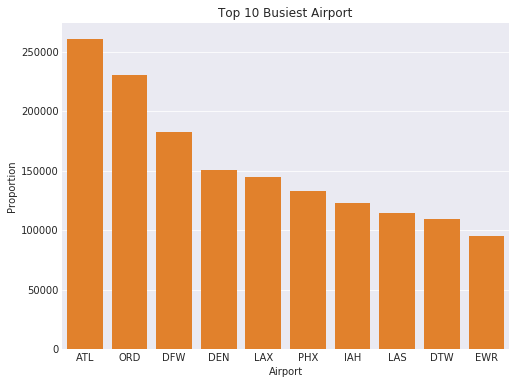

In [42]:
plt.figure(figsize=(8, 6))

# Plot of the top 10 airport by origin

# declare the base color
default_color = sb.color_palette()[1]


# store the top 10, add annotations and visualize the graph
top_busiest = flight['Origin'].value_counts().sort_values(ascending = False).head(10)
sb.barplot(top_busiest.index, top_busiest.values, color = default_color);
plt.ylabel('Proportion')

# call the function for xlabel and title

viz('Airport', 'Top 10 Busiest Airport')

 Atlanta Airport(ATL) has the highest number of flight so they are considered as the topmost busiest airport.

### Distribution of all delay variables

> Based on the aviation law according the the Federal Aviation Administration, a flight is considered delayed when the delay is more than 15 minutes. My focus will be on delays afer 15 minutes.

In [3]:
#query arrival delay greater than 15 mins.

df_delay = flight.query('ArrDelay>= 15')

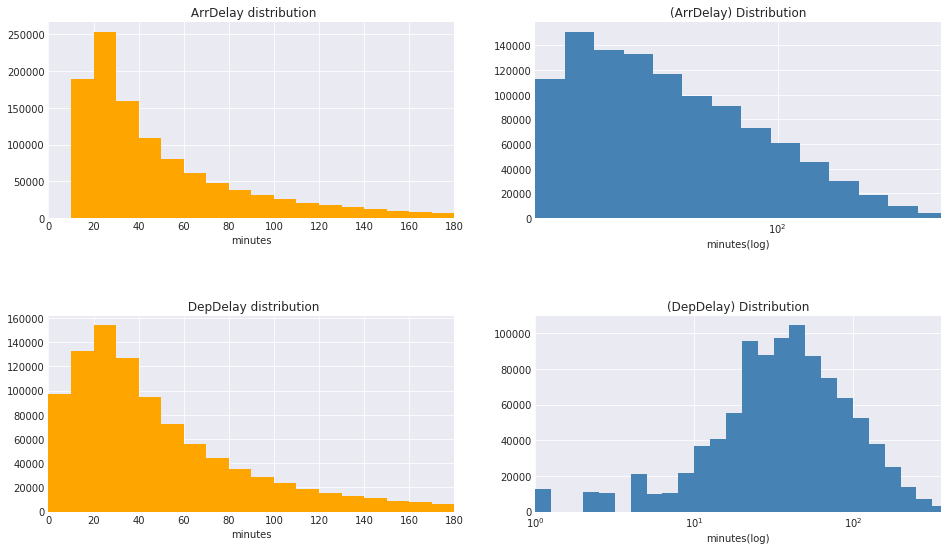

In [44]:
# Assign subplots to figure and axis variable

#two plots in one in two figures

fig, ax = plt.subplots(2, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.5)

# create a loop 

for i, k in enumerate(['ArrDelay', 'DepDelay']):
# standard-scaled plot (left plot)
    binsize=10
    data = df_delay[df_delay[k]>0]
    
    #specify bin edges
    bin_edges = np.arange(0, data[k].max()+binsize, binsize)
    ax[i, 0].hist(data[k], bins = bin_edges, color='orange')
    ax[i, 0].set_xlabel('minutes');
    ax[i, 0].set_title(f' {k} distribution');
    ax[i, 0].set_xlim(0,180)

 # standard-scaled plot (right plot)   
    binsize=0.1
    
 #specify bin edges
    bin_edges = 10 ** np.arange(np.log10(data[k].min()), np.log10(data[k].max())+binsize, binsize)
    ax[i, 1].hist(data=data, x = k, bins=bin_edges, color='steelblue')
    ax[i, 1].set_xscale('log')
    ax[i, 1].set_xlim(0,360)
    ax[i, 1].set_xlabel('minutes(log)')
    ax[i, 1].set_title(f'({k}) Distribution')

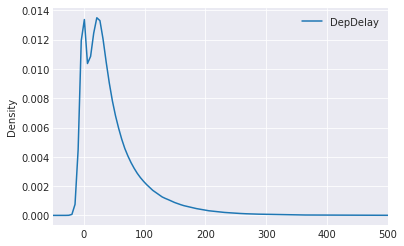

In [45]:
#density plot

df_delay.loc[:,['DepDelay']].plot.density(xlim=(-50,500))

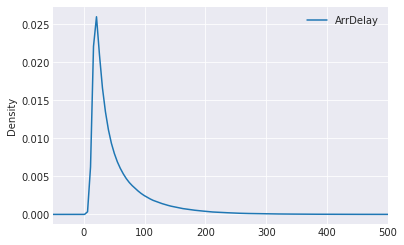

In [46]:
#density plot

df_delay.loc[:,['ArrDelay']].plot.density(xlim=(-50,500))

The histograms show that both ArrDelay and DepDelay are right skewed, implying that the majority of the data is lower bound. This was also supported by the density plots. The Departure Delay log also has more symmetry than the Arrival Delay log.

### What is the average time for each delay

In [6]:
# query all delays and get mean values

delays = df_delay[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].mean().rename_axis('Delay').reset_index(name = 'minutes')

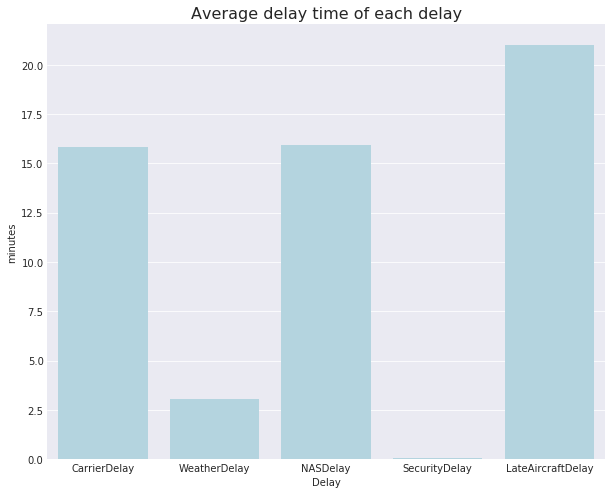

In [48]:
#bar plots

fig, ax = plt.subplots(figsize=(10,8))

sb.barplot( data = delays, x ='Delay', y = 'minutes', color = 'lightblue')
#plt.ylabel = ('Average(minutes)')
#plt.xlabel = ('Delay Types')

plt.title('Average delay time of each delay', size=16)

plt.show()

The lateaircraftdelay had the greatest average delay time per delay, while the security detail had the shortest.

### What is the proportion of these delay by time?

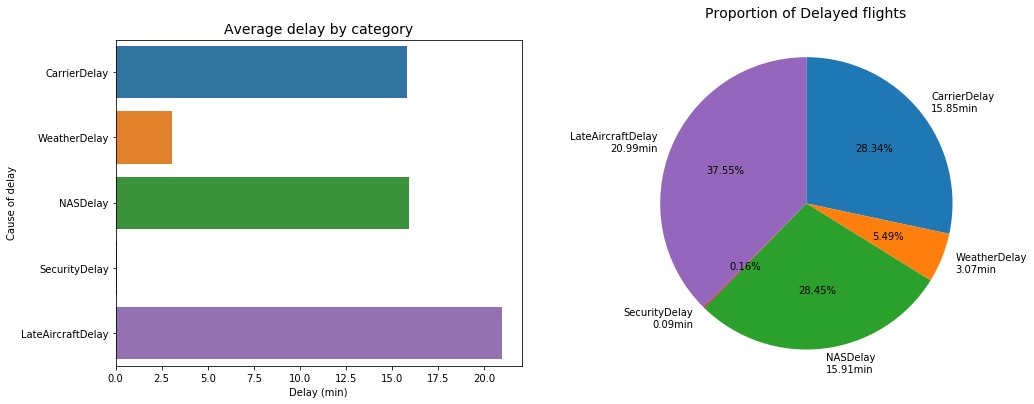

In [4]:
# define the shape size


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

# Plot the barplot
means = [df_delay[i].mean() for i in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
sb.barplot(means, ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])

# Define the x and y label and add title
plt.xlabel('Delay (min)')
plt.ylabel('Cause of delay')
plt.title('Average delay by category', fontsize=14)

# plot the circle graph
plt.subplot(1, 2, 2)
labels = [f'{j}\n{means[i]:.2f}min' for i, j in enumerate(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])]
plt.pie(means, labels=labels, startangle=90, counterclock=False, autopct='%.2f%%');
plt.axis('square');
plt.title('Proportion of Delayed flights\n', fontsize=14);

Late Aircraft accounts for the greatest proportion of delay (37.55%). The maximum average delay (21min) is also caused by the late arrival of the aircraft.

### What is the airtime distribution?

In [49]:
flight['AirTime'].dropna(inplace = True)

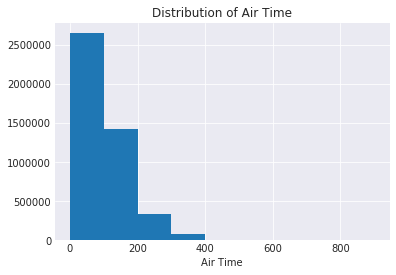

In [50]:
#Let's check the distribution of the Airtime

#df = flight['Airtime'].dropna()

bin = np.arange(0, flight['AirTime'].max()+5, 100)
plt.hist(data = flight, x = "AirTime", bins = bin)

# call the function for xlabel and title
viz('Air Time', 'Distribution of Air Time')


There are some extreme values in the airtime distribution for value greater than 400. Let's confirm if the high values are from flight from the far distance airport (Huwai).

In [51]:
# check if the extremely high values are from the flight data from and to extreme airport

assert flight[(flight.AirTime > 400) & (~flight.Origin.isin(extreme_airport))\
& (~flight.Dest.isin(extreme_airport))].shape[0]

Clearly, because no error was reported, the extreme values greater than 400 in the Airtime distribution graph above are from the 15 regions we highlighted earlier. That is, from an airport that is more than 3000 kilometers away (Huwai region).

Let's take a closer look at the distribution of airtime.

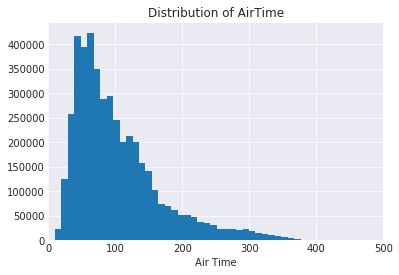

In [52]:
# A closer look at the airtime distribution.

plt.hist(data = flight, x = "AirTime", bins = 100)
plt.xlim([0,500])

# call the function for xlabel and title
viz('Air Time', 'Distribution of AirTime')

There is a long right tail in the distribution.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of distance, airtime, arrival delay, and departure delay were all skewed, implying that more data were of the lower bounds. The distance, airtime, arrival, and departure delays were also transformed logarithmically to naturally reduce the dynamic range of the variables, preserving the differences while keeping the scale from becoming too skewed. According to the histogram, the distance variable had a few points after 3000 that appeared unusual and could be considered outliers. Further investigation revealed that flights with a distance greater than 3000 originated or departed from a specific airport location (Hawaii). To verify this, I investigated the distances between that airport and discovered that they were exactly as stated in the data provided. As a result, no drop was performed.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- To preserve the original dataset, I dropped all duplicates in the dataset before cleaning.

## Bivariate Exploration

> In this section, we'll start by looking at the pairwise correlations between the features in our data. Following that, we will assess the following:
- Which airline has the highest proportion of cancelled and delayed flights, and why are they cancelled or delayed?
- Is there a link between different types of delays?
- What factor is responsible for the longest delays?
- Which airport has the most flight delays?
- What is the relationship between airtime, distance, and delay?

### What is the relationship between airtime, distance, and delay?

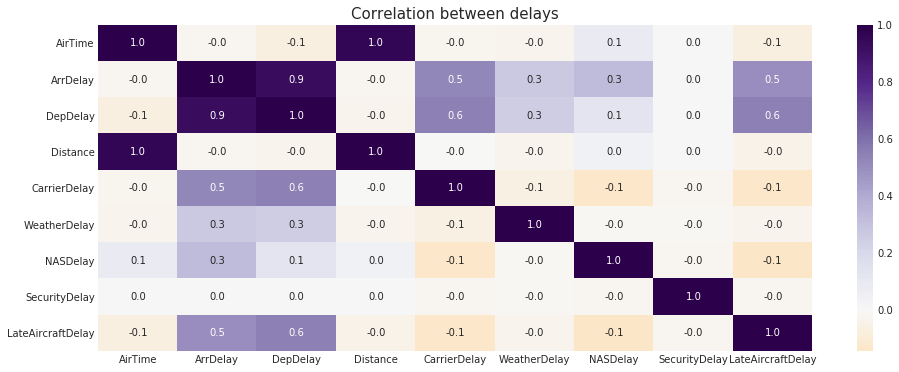

In [53]:

# Heatmap plot

plt.figure(figsize=(16, 6))
sb.heatmap(df_delay[['AirTime','ArrDelay', 'DepDelay','Distance','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr(), annot=True, fmt='.1f', cmap='PuOr', center=0);

plt.title('Correlation between delays', size=15);

In our heatmap, we used the following rule of thumb to judge correlation strength:

0.7≤∣r∣≤1.0 - Strong

0.3≤∣r∣ < 0.7 - Moderate

0.0≤∣r∣<0.3 - Weak

In this case, r represents the values on the heatmap, and the darker colors indicate strong correlations.

The Heatmap revealed the strongest correlations between:
1) Airtime and Distance 2) Departure and arrival delays

Weak correlations were observed between delays in Airtime and DepDelay (Carrier, Weather, NAS, Security and LateAircraft)

For a clearer picture of this correction, let's proceed as follows:



In [54]:
# use the Iloc to drop unwanted columns 

df_pair = df_delay.iloc [:,[6,12,13,14,17,20,21,22,23,24]]

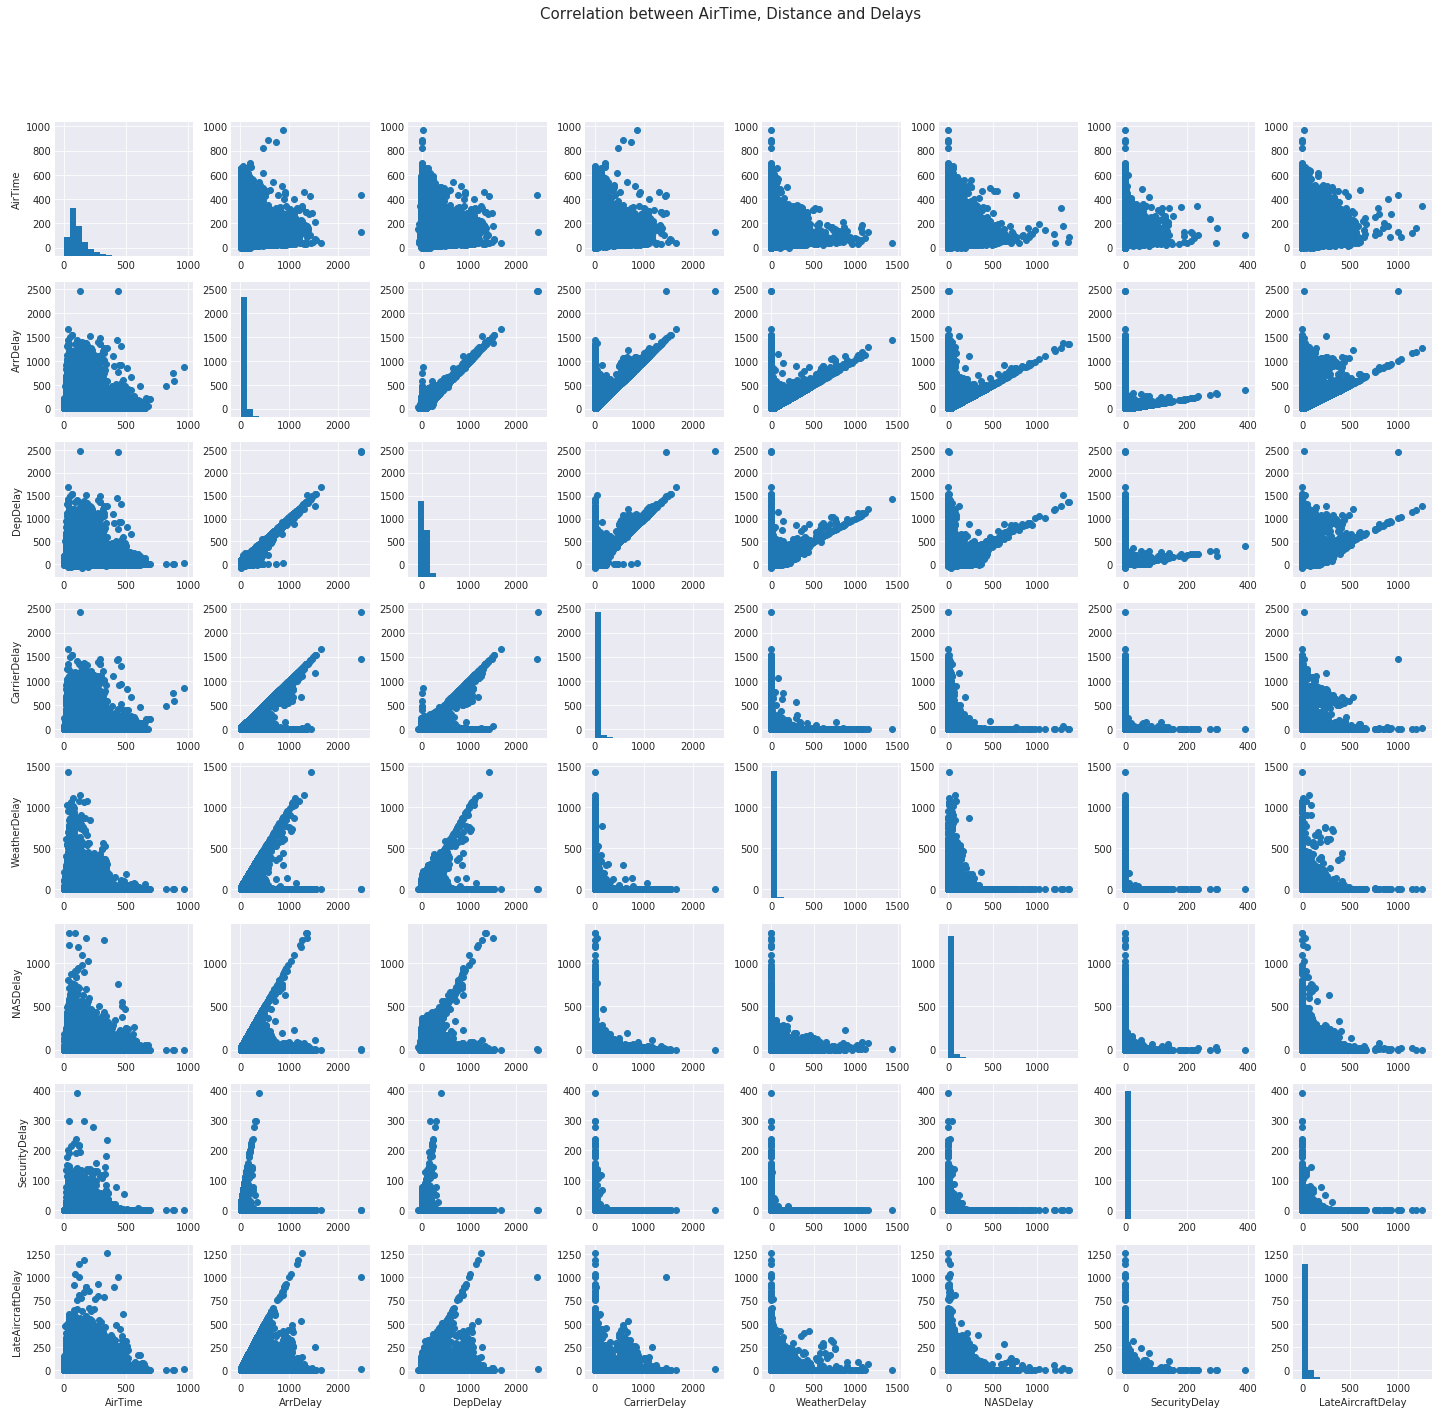

In [55]:
# Scater matrix plot

g = sb.PairGrid(data=df_pair, vars=['AirTime','ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']);
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);
plt.subplots_adjust(top=0.9)
plt.suptitle('Correlation between AirTime, Distance and Delays', size=15);

This scatter plot pair grid visual depicts the correlation between variables plotted on the heat map in greater detail. Arrival and departure delays have a high correlation, which is to be expected.

### Which among these delay  accounted for the least delay and highest arrival delay?

In [7]:
# melt all delay columns to one coloumn

all_delays = pd.melt(df_delay, id_vars = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime','ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled','CancellationCode'], value_vars=['CarrierDelay', 'WeatherDelay',
'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], var_name = 'Delay_type', value_name ='Delay')

all_delays['Delay_type'] = all_delays['Delay_type'].str[:-5]

all_delays =all_delays[all_delays.Delay>0]

In [57]:
all_delays['Delay_type'].value_counts()

NAS             662934
LateAircraft    526243
Carrier         502999
Weather          76073
Security          5518
Name: Delay_type, dtype: int64

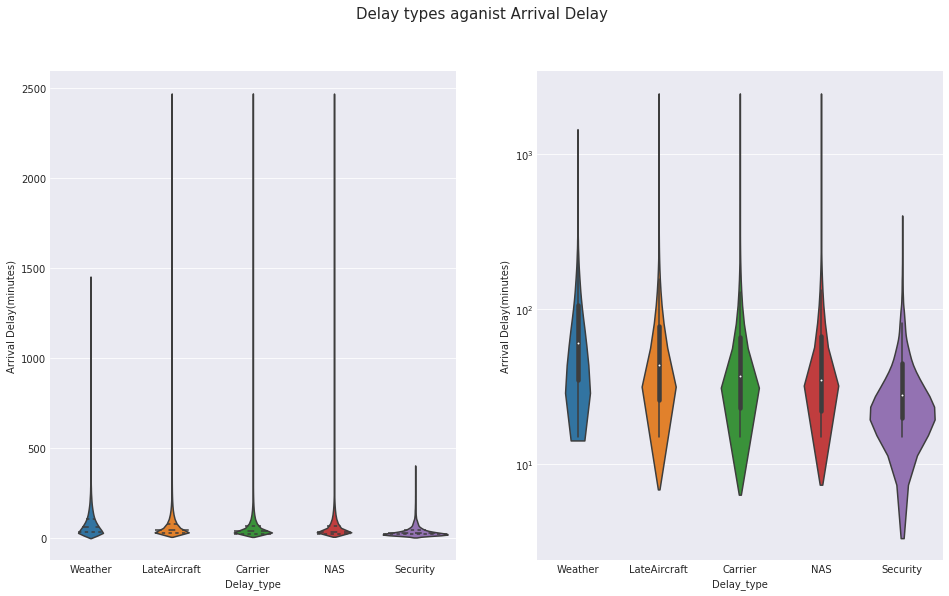

In [58]:
# violin plot

fig,ax = plt.subplots(1,2,figsize=(16,9))

order1 = all_delays.groupby('Delay_type')['ArrDelay'].mean().sort_values(ascending = False).index
sb.violinplot(data = all_delays, x='Delay_type', y = 'ArrDelay', order = order1,inner='quartile', ax =ax[0])
sb.violinplot(data = all_delays, x='Delay_type', y = 'ArrDelay', order = order1, ax=ax[1])
ax[1].set_yscale('log')

plt.suptitle('Delay types aganist Arrival Delay', size=15);
ax[1].set_ylabel('Arrival Delay(minutes)')
ax[0].set_ylabel('Arrival Delay(minutes)')

plt.show()

Weather delays were the most common cause of arrival delays, while security delays were the least common.

### Which airport has the most flight delays?

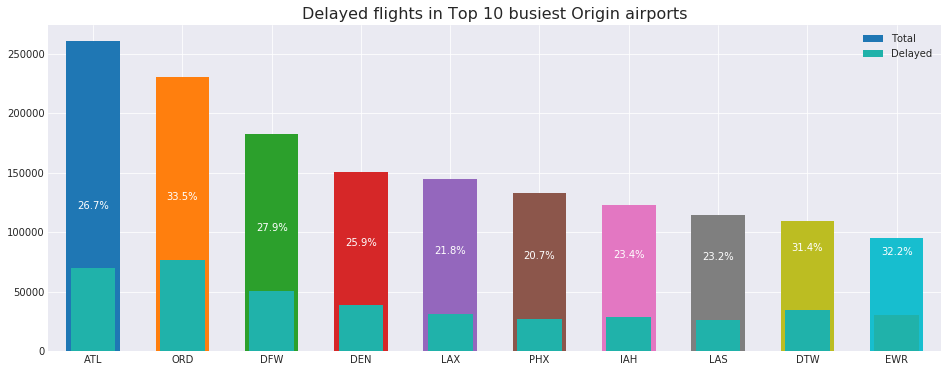

In [59]:
plt.figure(figsize=(16, 6))
gen_counts = flight['Origin'].value_counts()[:10]

delayed_gen_counts = df_delay['Origin'].value_counts()[:10]
gen_counts.plot.bar(label='Total', width=.6)
# sns.barplot(gen_counts.index, gen_counts.values, order=gen_counts.index, label='Total', color=base_color)
# use order or reindex
delayed_gen_counts.reindex(gen_counts.index).plot.bar(label='Delayed', color='lightseagreen')
# sns.barplot(delayed_gen_counts.index, delayed_gen_counts.values, order=gen_counts.index, label='Delayed', color='lightseagreen')
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    delayed_count = delayed_gen_counts[label.get_text()]
    pct_string = f'{100*delayed_count/count:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, delayed_count+0.05e6, pct_string, ha = 'center', color='w')
plt.legend()
plt.xticks(rotation=0)
plt.title('Delayed flights in Top 10 busiest Origin airports', fontsize=16);

ATL clearly has the greatest number of delays.

ATL is the busiest airport, with 26.7% of flights delayed.
EWR has the highest proportion of delayed flights (32.5%) among the top ten busiest airports.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Distance and airtime had a strong positive correlation, which means that the longer the distance, the longer the airtime, and vice versa. Departure and arrival delays also had a positive correlation, which makes sense given that when an aircraft is delayed at the origin airport, it is more likely to arrive late at the destination airport.

- Carrier issues are the most common cause of flight cancellations, followed by weather issues.

- In the top 10 busiest airports, EWR has maximum proportion (32.2%) of delayed flights.

## Multivariate Exploration


### Is there a relationship between delay and arrival delay per carrier(airline)?

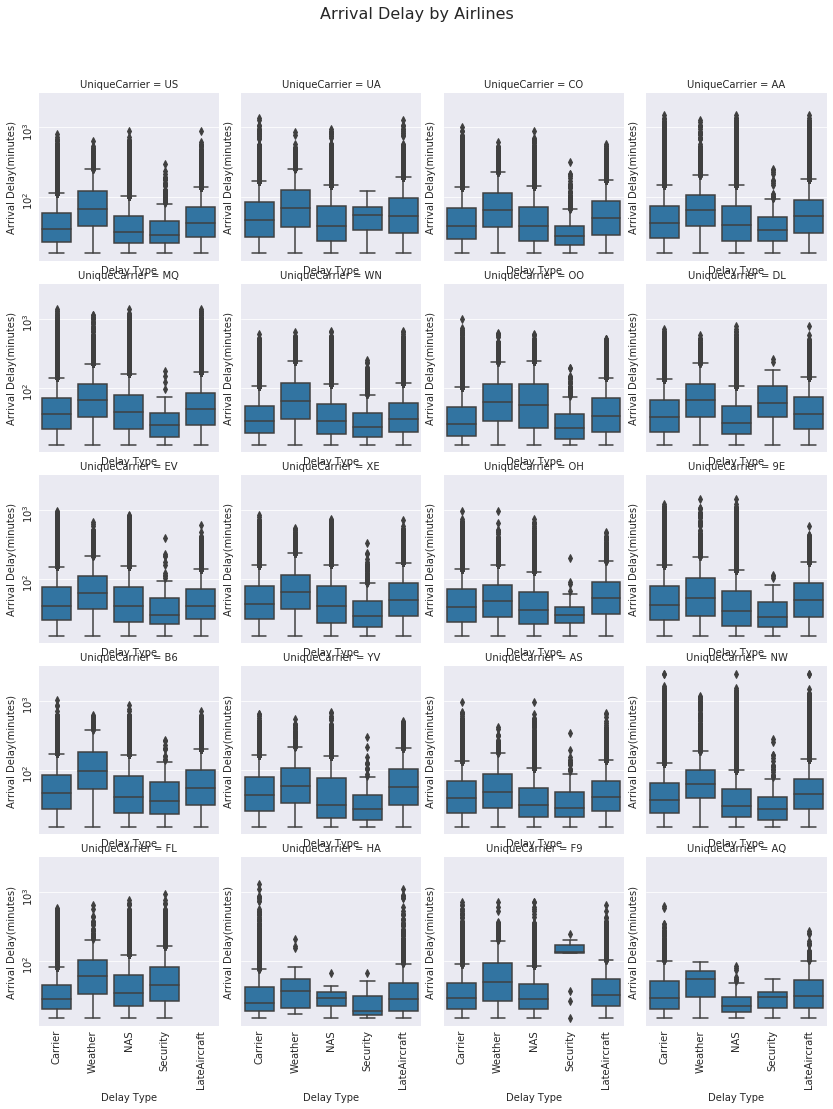

In [60]:
g = sb.FacetGrid(data=all_delays, col='UniqueCarrier', col_wrap=4)
g.map(sb.boxplot, 'Delay_type', 'ArrDelay')
plt.yscale('log');
plt.subplots_adjust(top=0.9)
plt.suptitle('Arrival Delay by Airlines', size=16);

# set_facet_title()

# # Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.tick_params(rotation=90)
    ax.set_xlabel('Delay Type')
    ax.set_ylabel('Arrival Delay(minutes)')
    
plt.show()

The majority of airlines experience longer delays as a result of bad weather followed by late flights. There are clearly many outliers among all airlines (shown by dots outside the boxplot). Except for one or two airlines, such as F9, security delays are the shortest.

### What is the relationship between arrival delay and distance for each unique carrier?

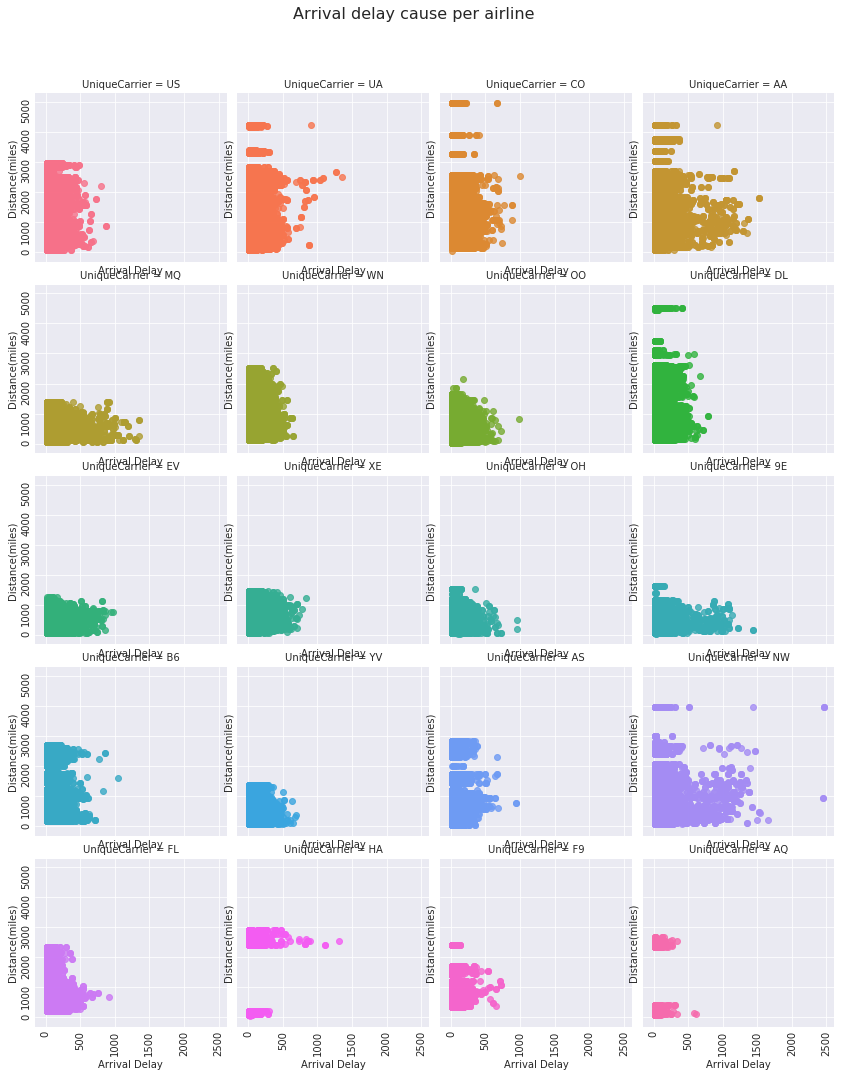

In [73]:
#scatter plot

g = sb.FacetGrid(data=all_delays, col='UniqueCarrier',hue='UniqueCarrier', col_wrap=4)
g.map(sb.regplot, 'ArrDelay', 'Distance', fit_reg=False)
#plt.yscale('log');
plt.subplots_adjust(top=0.9)
plt.suptitle('Arrival delay cause per airline', size=16);

# set_facet_title()

# # Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.tick_params(rotation=90)
    ax.set_xlabel('Arrival Delay')
    ax.set_ylabel('Distance(miles)')

There is no relationship between arrival time and distance for each unique carrier. As a result, we cannot say that aircrafts are delayed due to longer or shorter distances.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Weather was the most common cause of delays, while security was the least common.

- Late aircraft appear to be the major cause of delays, but this may be biased because some data points are overshadowed. However, based on the bivariate analysis, Late Aircraft is the major delay factor.

### Were there any interesting or surprising interactions between features?
> I discovered that there was no link.
- ATL is the busiest airport, accounting for 5.6% of all flights.
- The majority of flights (42.78%) were canceled due to Carrier reasons, followed by Weather (36.18%).

## Conclusions
> The flight datasets were interesting to analyze, and my investigation, which began with a univariate analysis, revealed more information about variables as well as the normal scale and log distribution of some. Furthermore, I conducted a bivariate and multivariate exploration on critical features for my investigation, with all findings documented at the end of each exploration phase.
